### Compare yt load versus pymses load w/ fields specified

In [1]:
import yt
import pymses
from pymses.sources.ramses import output

pymses.RamsesOutput.amr_field_descrs_by_file = \
   {"2D": {"hydro" : [ output.Scalar("rho", 0), output.Vector("vel", [1, 2, 3]),
           output.Vector("Bl", [4,5,6]), output.Vector("Br", [7,8,9]),
           output.Scalar("P", 10),output.Scalar("Z", 11)], 
            "grav"  : [ output.Vector("g", [0, 1, 2]) ]},
   "3D": {"hydro" : [ output.Scalar("rho", 0), output.Vector("vel", [1, 2, 3]),
                      output.Scalar("P_nt", 4), output.Scalar("P", 5),
                     # P is the thermal pressure, out of which you can calculate the temperature (T \propto P/rho)
                     # P_nt is the non-thermal (turbulent) component
                      output.Scalar("Z", 6), 
                      output.Scalar("H",8), 
                      output.Scalar("E",9), 
                      output.Scalar("H+",10), 
                      output.Scalar("HE", 11), 
                      output.Scalar("HE+",12), 
                      output.Scalar("HE++", 13), 
                      output.Scalar("H-", 14), 
                      output.Scalar("H2", 15), 
                      output.Scalar("H2+", 16)],
       "grav"  : [ output.Vector("g", [0, 1, 2]) ]}}

amrviewer GUI ImportError : are WxPython and PyTables correctly installed?


In [2]:
# pymses
ro = pymses.RamsesOutput("output", 28)
amr = ro.amr_source(["rho", "H2"])

# yt
_ds  =  yt.load("output/output_00028/info_00028.txt", \
          fields = ["Density","x-velocity", "y-velocity", "z-velocity", "Pressure_nt", \
                    "Pressure", "Z", "ref", "H", "E", "H+", "HE", "HE+", "HE++", "H-", "H2", "H2+"])

yt : [INFO     ] 2018-07-05 13:42:59,344 Parameters: current_time              = 3.17276944493
yt : [INFO     ] 2018-07-05 13:42:59,345 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-07-05 13:42:59,346 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-07-05 13:42:59,347 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-07-05 13:42:59,348 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-07-05 13:42:59,348 Parameters: current_redshift          = 5.99989573953
yt : [INFO     ] 2018-07-05 13:42:59,349 Parameters: omega_lambda              = 0.691999971867
yt : [INFO     ] 2018-07-05 13:42:59,350 Parameters: omega_matter              = 0.307999998331
yt : [INFO     ] 2018-07-05 13:42:59,350 Parameters: hubble_constant           = 0.677900009155


Computing hilbert minimal domain description for output 28 ...
Done !


In [3]:
#pymses
center = [0.5, 0.5, 0.5]
radius = 0.1

from pymses.utils.regions import Sphere 
sph = Sphere(center, radius)

from pymses.filters import RegionFilter 
point_dset = RegionFilter(sph, amr)

import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
from pymses.filters import RegionFilter, CellsToPoints

amr_cell = CellsToPoints(point_dset).flatten()

Read and filter time : 7.08 s
Reading amr data  : output/output_00028/amr_00028.out00001
Reading amr data  : output/output_00028/amr_00028.out00002
Reading amr data  : output/output_00028/amr_00028.out00003
Reading amr data  : output/output_00028/amr_00028.out00004
Reading hydro     : output/output_00028/hydro_00028.out00001Reading hydro     : output/output_00028/hydro_00028.out00002Reading hydro     : output/output_00028/hydro_00028.out00003Reading hydro     : output/output_00028/hydro_00028.out00004



Reading amr data  : output/output_00028/amr_00028.out00007Reading amr data  : output/output_00028/amr_00028.out00006Reading amr data  : output/output_00028/amr_00028.out00005Reading amr data  : output/output_00028/amr_00028.out00008



Reading hydro     : output/output_00028/hydro_00028.out00007Reading hydro     : output/output_00028/hydro_00028.out00006Reading hydro     : output/output_00028/hydro_00028.out00005Reading hydro     : output/output_00028/hydro_00028.out00008



Reading am

/Users/admin/Research/pymses_4.0.0/pymses/sources/ramses/octree.py:362: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.active_mask == None:
/Users/admin/Research/pymses_4.0.0/pymses/sources/ramses/octree.py:362: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.active_mask == None:
/Users/admin/Research/pymses_4.0.0/pymses/sources/ramses/octree.py:362: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.active_mask == None:
/Users/admin/Research/pymses_4.0.0/pymses/sources/ramses/octree.py:362: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.active_mask == None:


In [5]:
amr_cell['H2']

array([  1.48893191e-17,   1.88308263e-17,   1.62484160e-17, ...,
         1.40303748e-08,   1.40303748e-08,   1.40303748e-08])

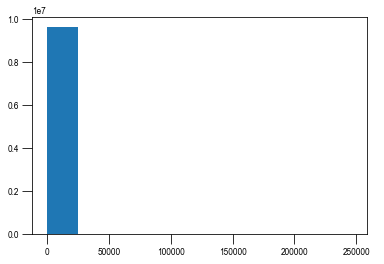

In [6]:
plt.hist(amr_cell['H2'] * amr_cell['rho'])
plt.show();

In [7]:
# yt
sp = _ds.sphere(center, radius)

yt_cell = sp['Density'] * sp['H2'] 


In [8]:
yt_cell

YTArray([  1.94209178e-19,   1.83722020e-19,   2.00898066e-19, ...,
         2.88346482e-18,   4.06132030e-18,   3.08400027e-18]) code_density

In [9]:
yt_cell = yt_cell.flatten()

In [10]:
import numpy as np
yt_cell = np.array(yt_cell)

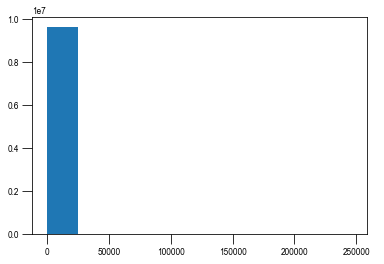

In [11]:
plt.hist(yt_cell)
plt.show();

In [12]:
print yt_cell.min(), yt_cell.max()

amr_cell_h2 = amr_cell['H2'] * amr_cell['rho']
print amr_cell_h2.min(), amr_cell_h2.max()


0.0 246430.753196
0.0 246430.753196


### Q: rho * H2 from yt and pymses are not identical?

A: this was fixed, after we included the "ref field" in field #7, which we previously skipped because it contains structure of the AMR, and we didn't care.